# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.149632e+01     8.858134e+00
 * time: 0.005042076110839844
     1     2.909676e+01     5.204152e+00
 * time: 0.024131059646606445
     2     2.235088e+01     6.356512e+00
 * time: 0.04713606834411621
     3     1.829291e+01     8.411686e+00
 * time: 0.07005715370178223
     4     1.362665e+01     4.165564e+00
 * time: 0.0932011604309082
     5     1.026022e+01     1.505772e+00
 * time: 0.11649012565612793
     6     9.377705e+00     1.230434e+00
 * time: 0.13535213470458984
     7     8.974680e+00     8.139424e-01
 * time: 0.1542351245880127
     8     8.727121e+00     7.692137e-01
 * time: 0.17267203330993652
     9     8.522169e+00     7.373546e-01
 * time: 0.19115304946899414
    10     8.401802e+00     6.796394e-01
 * time: 0.20956802368164062
    11     8.316076e+00     6.497690e-01
 * time: 0.22825217247009277
    12     8.210061e+00     4.602365e-01
 * time: 0.2469780445098877
    13     8.154706e+00     7.648468e-01
 * time: 

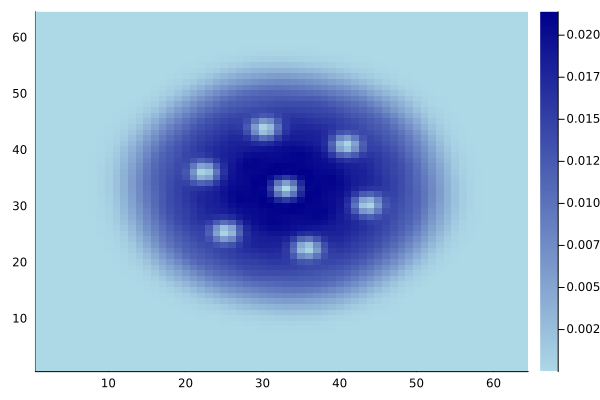

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)